In [529]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [530]:
#uploading the data
data=pd.read_csv(r"C:\Users\USER\Desktop\Intermediate-Big Mart\train_v9rqX0R.csv")

In [531]:
#Displaying first 5 rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [532]:
#displaying last 5 Rows
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [533]:
#checking dimensions of training and testing dataset
print(f"Data contains {data.shape[0]} observations with {data.shape[1]} features")

Data contains 8523 observations with 12 features


In [534]:
#Basic information of data
print("\t\tBasic information of the dataset")
print("************************************************************\n")
data.info()

		Basic information of the dataset
************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: floa

In [535]:
#checking summary details of dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [536]:
#categorical features of data data
categorical_data = data.select_dtypes(include =[np.object])
print("Categorical Features in data Set:\n",categorical_data.columns)

#numerical features of data data
numerical_data= data.select_dtypes(include =[np.float64,np.int64])
print("\nNumerical Features in data Set:\n",numerical_data.columns)

Categorical Features in data Set:
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Numerical Features in data Set:
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [537]:
#Unique values in  categorical columns
for i in categorical_data:
    print(i,":",len(pd.unique(data[i])))

Item_Identifier : 1559
Item_Fat_Content : 5
Item_Type : 16
Outlet_Identifier : 10
Outlet_Size : 4
Outlet_Location_Type : 3
Outlet_Type : 4


In [538]:
# Unique Values
for i in ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    print(i,":",pd.unique(data[i]))

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' nan 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [539]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['reg'],['Regular'])

In [540]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [541]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [542]:
data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [543]:
#checking for missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling Missing Values

In [544]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [545]:
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
col=data['Item_Weight'].isnull()
for i, item in enumerate(data['Item_Identifier']):
    if col[i]:
        if item in item_weight_mean:
            data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i] = np.mean(data['Item_Weight'])


In [546]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Handling Outliers

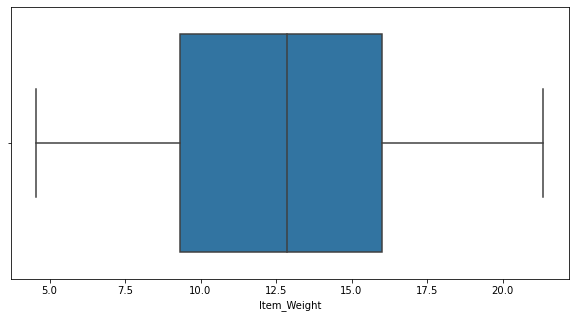

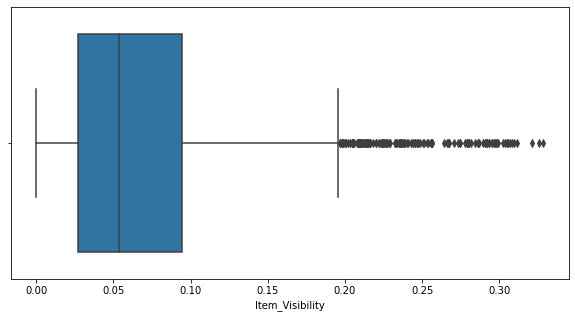

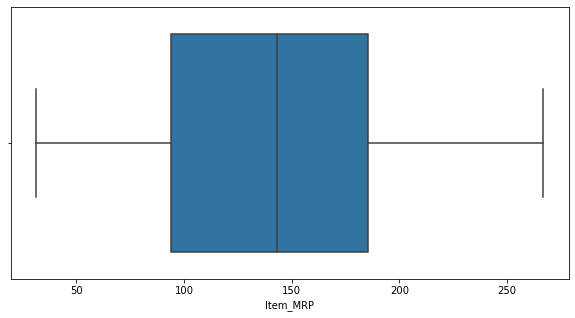

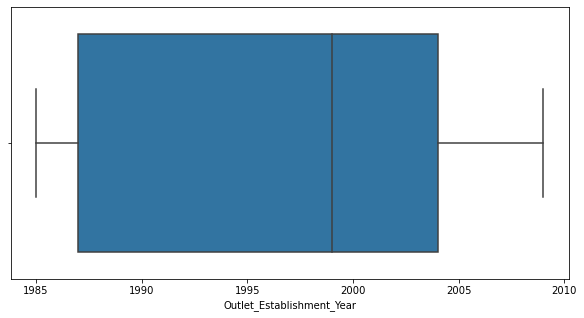

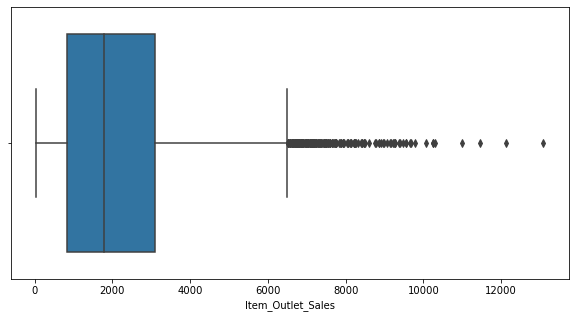

In [547]:
#boxplot of numerical variables in train dataset
for i in data.select_dtypes(include =[np.float64,np.int64]):
    plt.subplots(figsize=(10,5))
    sns.boxplot(data[i])
    plt.show()

In [548]:
#outlier handling in data dataset
for j in data.select_dtypes(include =[np.float64,np.int64]):
    Q1 = data[j].quantile(0.25)
    Q3 = data[j].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    data[j].where(data[j] >=l_lim,l_lim, inplace=True)  
    data[j].where(data[j] <=u_lim,u_lim, inplace=True)  

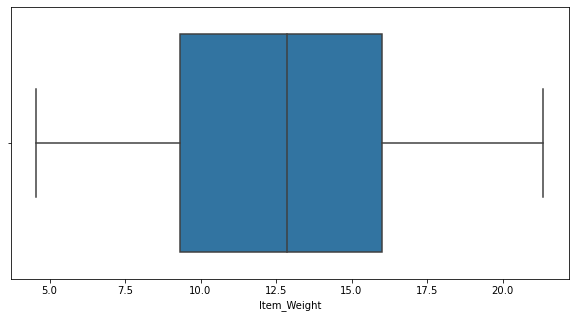

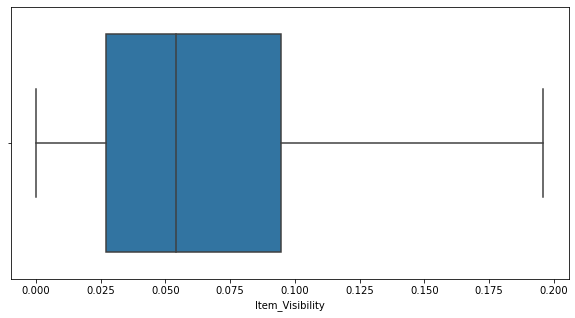

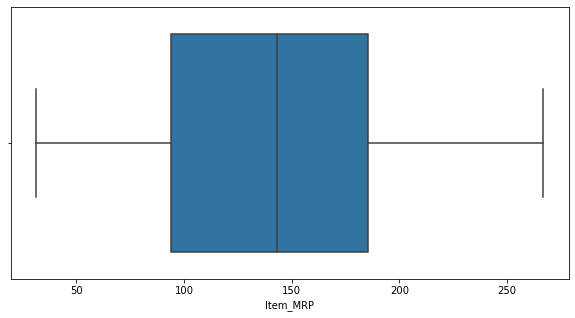

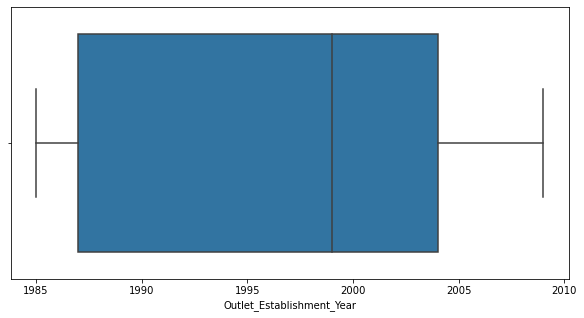

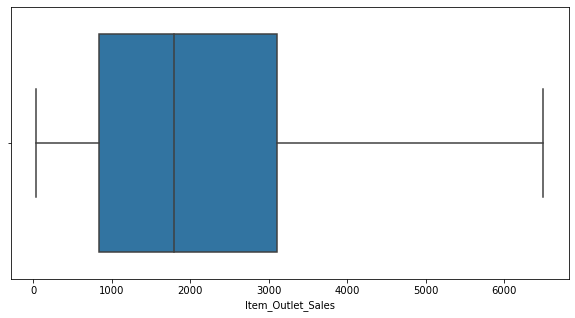

In [549]:
#boxplot of numerical variables in train dataset
for i in data.select_dtypes(include =[np.float64,np.int64]):
    plt.subplots(figsize=(10,5))
    sns.boxplot(data[i])
    plt.show()

## Exploratory Data Analysis

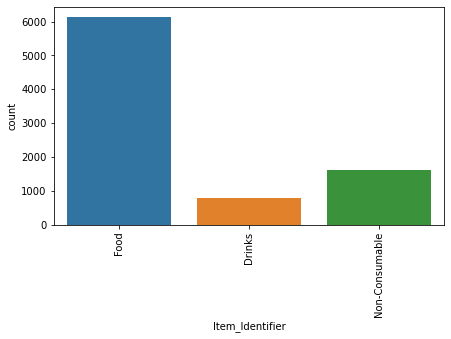

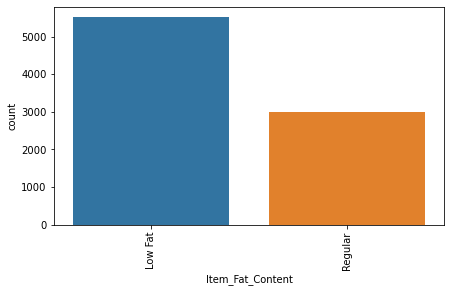

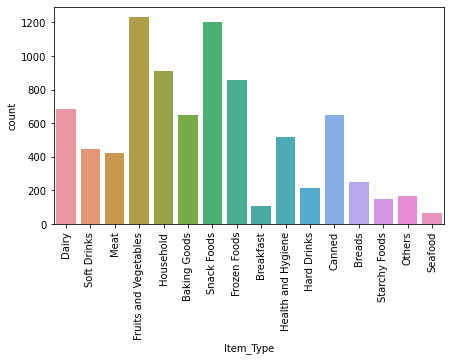

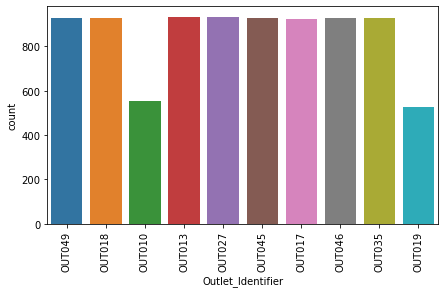

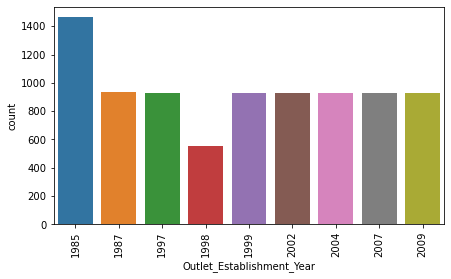

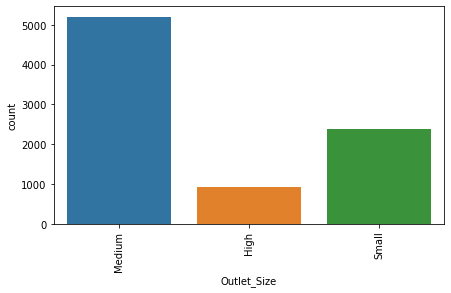

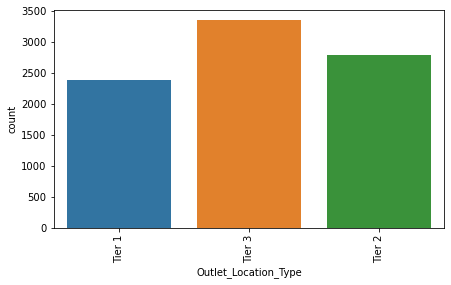

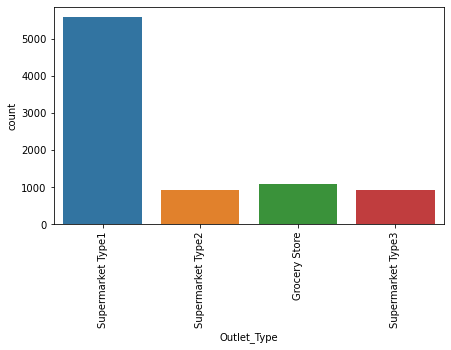

In [550]:
for i in data:
    if (data[i].nunique()<30):
        plt.subplots(figsize=(7,4))
        sns.countplot(x=data[i])
        plt.xticks(rotation=90)
        plt.show()

Text(0.5, 1.0, 'Item Fat Content')

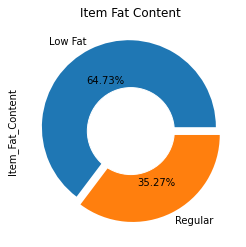

In [551]:
data.Item_Fat_Content.value_counts().plot.pie(figsize=(6,4),autopct="%0.2f%%",explode=[0.05,0.05])
circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show
plt.title('Item Fat Content',fontsize=12)

Text(0.5, 1.0, 'Item Types')

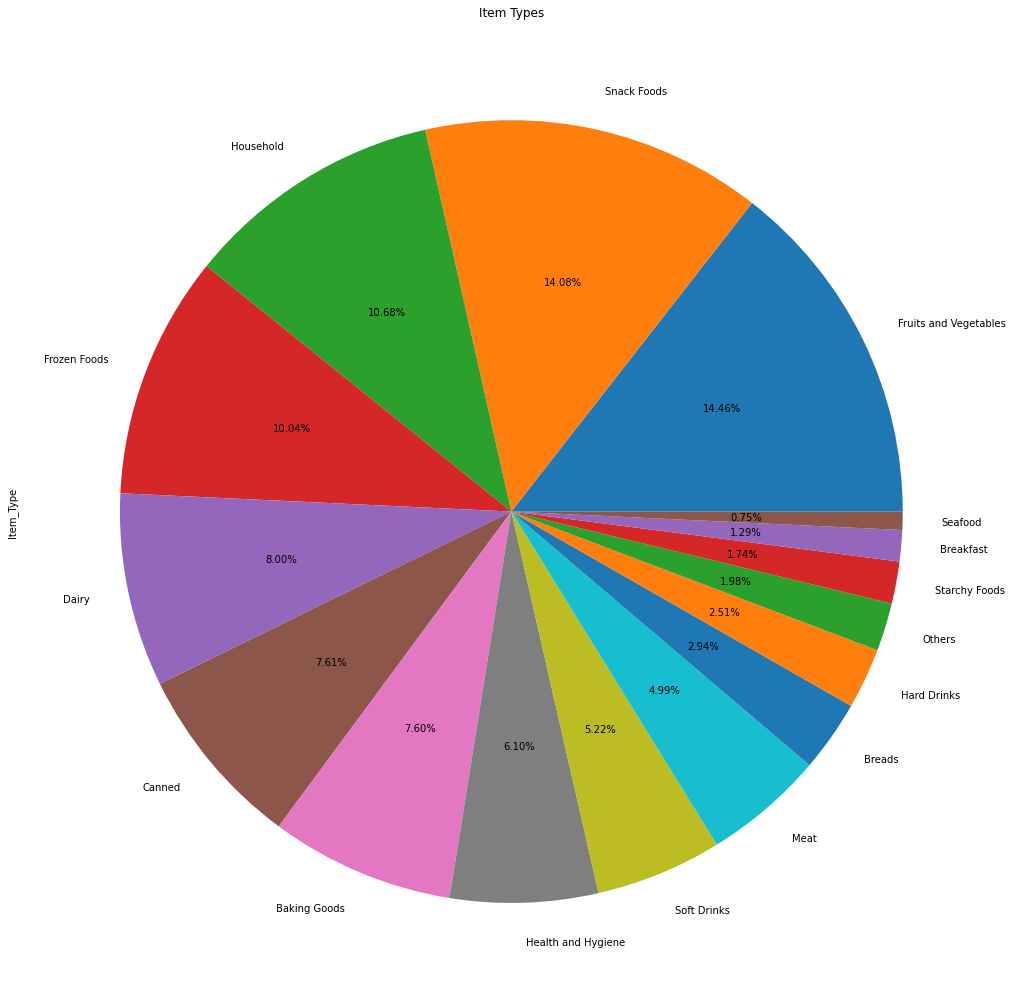

In [552]:
data.Item_Type.value_counts().plot.pie(figsize=(24,18),autopct="%0.2f%%")
plt.title('Item Types')

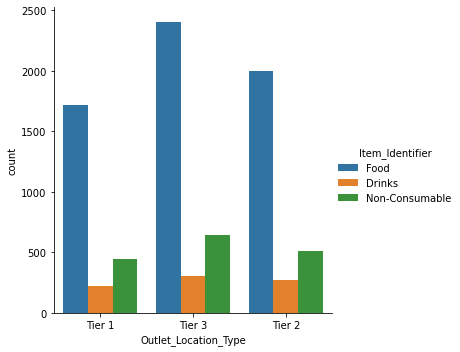

In [553]:
sns.catplot(x='Outlet_Location_Type', kind="count", hue='Item_Identifier',data=data)

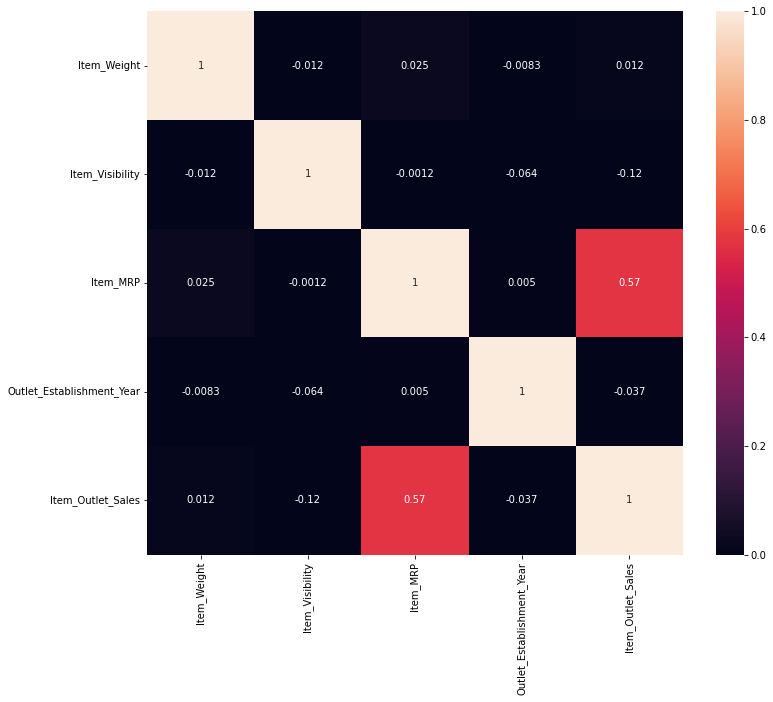

In [554]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),vmin=0,vmax=1,annot=True)
plt.show()

In [555]:
data.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [556]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


## Encoding

### Label Encoding

In [557]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier']:
    data[i]=le.fit_transform(data[i])

In [558]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,1,3735.1380
1,0,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,1,2,2,443.4228
2,1,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,1,2097.2700
3,1,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1,2,0,732.3800
4,2,8.93,0,0.000000,Household,53.8614,OUT013,0,2,1,994.7052


### One Hot Encoding

In [559]:
data=pd.get_dummies(data)

In [560]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,1,9.300,0,0.016047,249.8092,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,1
1,0,5.920,1,0.019278,48.2692,1,2,2,443.4228,0,...,0,0,0,1,0,0,0,0,0,0
2,1,17.500,0,0.016760,141.6180,1,0,1,2097.2700,0,...,0,0,0,0,0,0,0,0,0,1
3,1,19.200,1,0.000000,182.0950,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,2,8.930,0,0.000000,53.8614,0,2,1,994.7052,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,214.5218,0,2,1,2778.3834,0,...,0,1,0,0,0,0,0,0,0,0
8519,1,8.380,1,0.046982,108.1570,1,1,1,549.2850,1,...,0,0,0,0,0,0,0,1,0,0
8520,2,10.600,0,0.035186,85.1224,2,1,1,1193.1136,0,...,0,0,0,0,0,0,1,0,0,0
8521,1,7.210,1,0.145221,103.1332,1,2,2,1845.5976,0,...,0,0,0,1,0,0,0,0,0,0


## Scaling

In [561]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in ['Item_Visibility','Item_MRP','Item_Weight']:
        data[i] = ss.fit_transform(data[i].values.reshape(-1, 1))

## Modelling

In [562]:
X=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [563]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

## Linear Regression

In [564]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1023.3596173781026


## Lasso Regression

In [565]:
from sklearn.linear_model import Lasso
lr=Lasso()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1021.95226480979


## Ridge Regression

In [566]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1021.95226480979


## Decision Tree Regression

In [567]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1012.265527200048


## Support Vector Machine Regression

In [568]:
from sklearn.svm import SVR
svr=SVR(gamma='auto', kernel='linear', C=100)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1026.9684428022347


## Random Forest Regression

In [569]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=6)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  978.1249226135296


## KNN regression

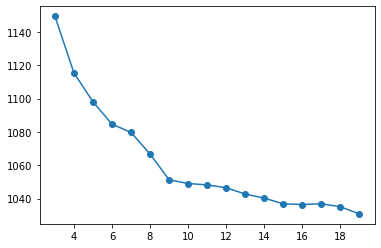

In [570]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
score=[]
for i in range(3,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_pred,y_test))
    score.append(rmse)
plt.plot(range(3,20),score,'o-')

In [571]:
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))

root Mean Squared Error :  1036.8960445881398


### Adaboost Regression

In [572]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor(n_estimators=20, random_state=42, learning_rate=0.07)
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
print("root Mean Squared Error : ",np.sqrt(mean_squared_error(y_pred,y_test)))


root Mean Squared Error :  1040.554340281895


## Fine Tuning

#### Tuning Hyperparameters of Decision Tree Regressor

In [573]:
def test_params_dt(**params):
    model = DecisionTreeRegressor(random_state=42, splitter='random', **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

In [574]:
def test_param_and_plot_dt(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_dt(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

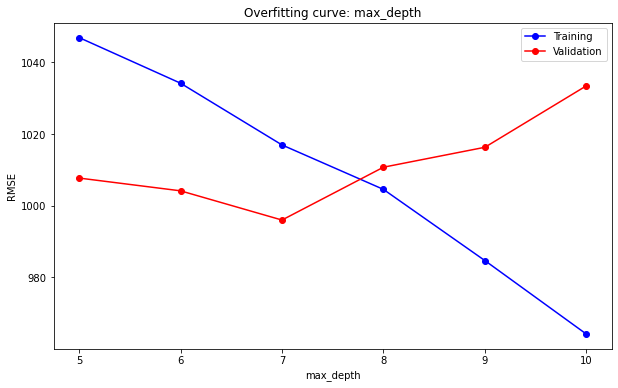

In [575]:
test_param_and_plot_dt('max_depth',[5,6,7,8,9,10])


#### Tuning Hyperparameters of Random Forest Regressor

In [576]:
def test_params_rf(**params):
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse
def test_param_and_plot_rf(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_rf(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

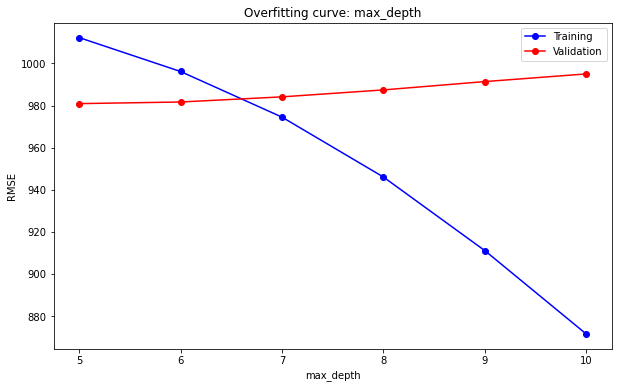

In [577]:
test_param_and_plot_rf('max_depth',[5,6,7,8,9,10])

###### Random forest regresser has the low RMSE value. So it is choosed for predictions.

## Test File

In [578]:
test=pd.read_csv(r"test_AbJTz2l.csv")

In [579]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [580]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [581]:
for i in ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    print(i,":",pd.unique(test[i]))

Item_Fat_Content : ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Type : ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Identifier : ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Size : ['Medium' nan 'Small' 'High']
Outlet_Location_Type : ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type : ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [582]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['reg'],['Regular'])

In [583]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [584]:
test['Item_Identifier'] = test['Item_Identifier'].apply(lambda x: x[:2])
test['Item_Identifier']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Identifier, Length: 5681, dtype: object

In [585]:
test['Item_Identifier'] = test['Item_Identifier'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test['Item_Identifier'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

### Handling Missing values

In [586]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [587]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [588]:
item_weight_mean = test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
col=test['Item_Weight'].isnull()
for i, item in enumerate(test['Item_Identifier']):
    if col[i]:
        if item in item_weight_mean:
            test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test['Item_Weight'][i] = np.mean(test['Item_Weight'])


In [589]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Handling outliers

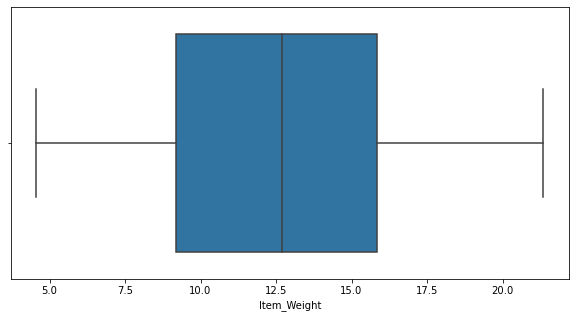

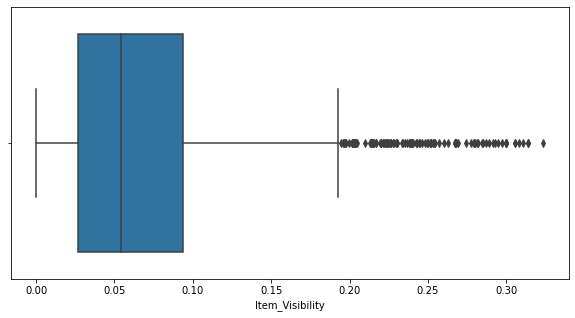

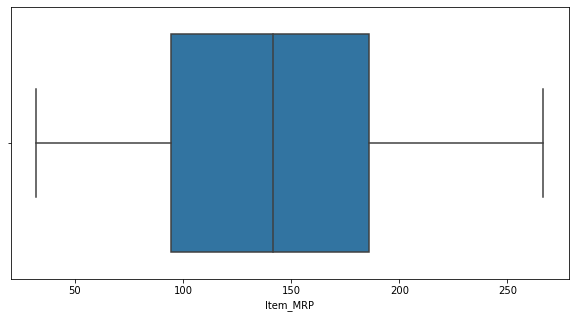

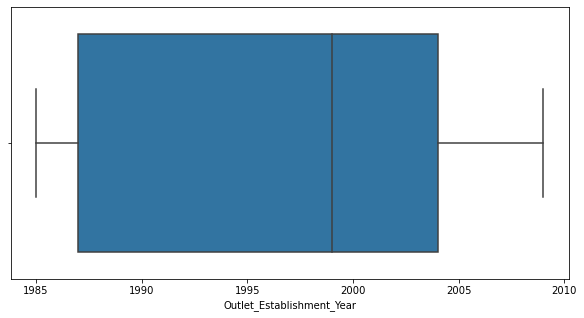

In [590]:
#boxplot of numerical variables in testset
for i in test.select_dtypes(include =[np.float64,np.int64]):
    plt.subplots(figsize=(10,5))
    sns.boxplot(test[i])
    plt.show()

In [591]:
#outlier handling in testset
for j in test.select_dtypes(include =[np.float64,np.int64]):
    Q1 = test[j].quantile(0.25)
    Q3 = test[j].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    test[j].where(test[j] >=l_lim,l_lim, inplace=True)  
    test[j].where(test[j] <=u_lim,u_lim, inplace=True)  

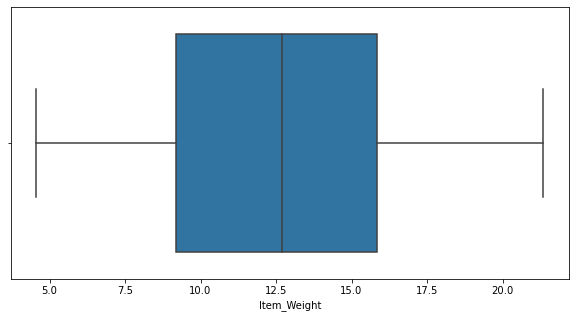

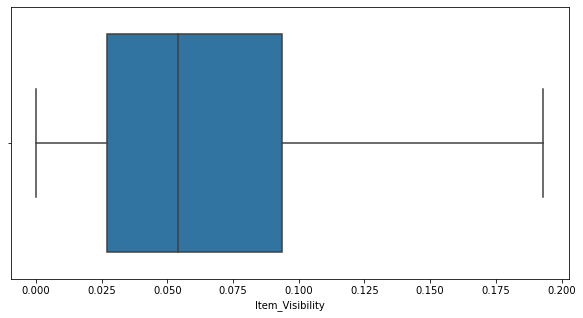

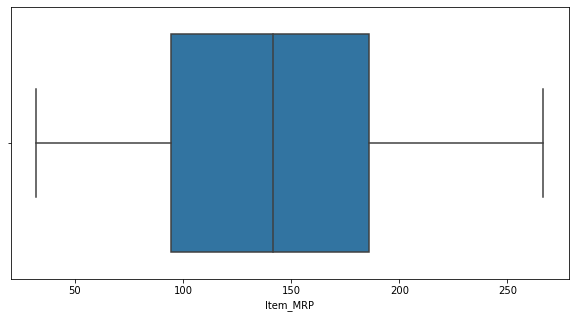

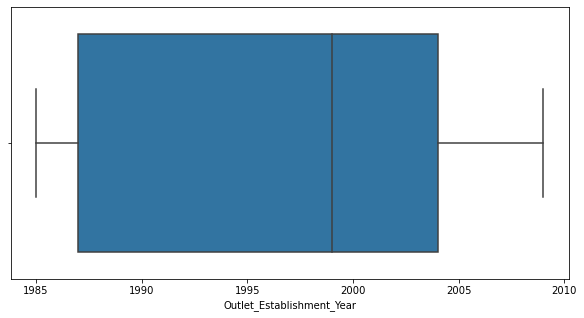

In [592]:
#boxplot of numerical variables in testset
for i in test.select_dtypes(include =[np.float64,np.int64]):
    plt.subplots(figsize=(10,5))
    sns.boxplot(test[i])
    plt.show()

### Encoding

#### Label Encoding

In [593]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier']:
    test[i]=le.fit_transform(test[i])

#### One Hot Encoding

In [594]:
test=pd.get_dummies(test)

In [595]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,1,20.750000,0,0.007565,107.8622,1999,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,8.300000,1,0.038428,87.3198,2007,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2,14.600000,0,0.099575,241.7538,1998,1,2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,7.315000,0,0.015388,155.0340,2007,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,12.695633,1,0.118599,234.2300,1985,1,2,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,141.3154,1997,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5677,1,7.600000,1,0.142991,169.1448,2009,1,2,2,0,...,0,0,0,1,0,0,0,0,0,0
5678,2,10.000000,0,0.073529,118.7440,2002,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
5679,1,15.300000,1,0.000000,214.6218,2007,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


### Feature Scaling

In [596]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in ['Item_Visibility','Item_MRP','Item_Weight']:
        test[i] = ss.fit_transform(test[i].values.reshape(-1, 1))

In [597]:
test.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [598]:
predictions=rfr.predict(test)

In [599]:
predictions

array([1642.78032365, 1372.30246895,  577.87181869, ..., 1996.44015397,
       3555.42748624, 1291.48911282])

## Sample Submission File

In [604]:
sample=pd.read_csv(r"sample_submission_8RXa3c6.csv")

In [605]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [606]:
sample['Item_Outlet_Sales']=predictions

In [608]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1642.780324
1,FDW14,OUT017,1372.302469
2,NCN55,OUT010,577.871819
3,FDQ58,OUT017,2500.308704
4,FDY38,OUT027,5483.938468
...,...,...,...
5676,FDB58,OUT046,2095.150913
5677,FDD47,OUT018,2753.989392
5678,NCO17,OUT045,1996.440154
5679,FDJ26,OUT017,3555.427486


In [609]:
sample.to_csv('my_submission_final.csv',index=False)

# Description

1.  Train file is readed
2.  Exploratory data analysis is done
3.  Missing values are handled using mode for categorical values and by mean for numerical values.
4.  Outliers are detected using boxplot and handled by replacing with lowerlimit and upperlimit
5.  Label Encoding is used for some attributes for some others One Hot Encoding is used
6.  Scaling is used 
7.  Modelling is done using some algorithms
8.  Some Hyper parameter tuning is performed
9.  Based on RMSE value best model is choosed
10. All the preprocessing done for train file is done for test file also
11. Predictions are made for Test data
12. Predictions values are appended to the sample submission file.